In [ ]:
#Importamos las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Esta vez agregamos una libreria nueva
#para calcular las estacionalidad, tendencia y residuo 
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Parte 1**

# **Preparación de los datos**

In [ ]:
url = "https://raw.githubusercontent.com/Wonga42/Fisica-Computacional-1/main/Actividad%201/EstacionDatos.txt"

# Se nombran las colúmnas para el df
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']

# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Saltamos los primeros 19 renglones y el último (skiprows), afirmamos que no nay encabezado (header=None)
# Proceamos los datos utilizando Python, engine='python' 

# df_Magdalena
df_Magdalena = pd.read_csv(url, names=my_cols, encoding="cp1251", sep="\s+", header=None, skiprows=19, skipfooter=1, engine="python")

# Observación del encabezado y el final de los datos
print(df_Magdalena.head())
print(df_Magdalena.tail())

# Observación de la dimensión de los datos
df_Magdalena.shape

# Observación de la información de los datos
df_Magdalena.info()

# Hacemos una copia de seguridad
df_c=df_Magdalena.copy()


# Se reemplazan los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_c = df_c.replace(to_replace=str_Nulo, value='', regex=True)
df_c.head()

# Imprimimos la info actualizada del df
df_c.info()
print(df_c.head())

# Convertimos los datos de la Estacion a valores numericos para poder trabajar los datos
columnas = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in columnas:
  df_c[cols] = pd.to_numeric(df_c[cols], errors="coerce")


# Checamos que datos faltan
df_c.isnull().sum()

# Breve analísis estadistico redondeado a 2 cifras.
df_c.describe().round(2)

# Nueva copia de seguridad
df_c1 = df_c.copy()

# Asignamos formato de fecha
df_c1["Fecha"] = pd.to_datetime(df_c1["Fecha"], dayfirst=True ).copy()

# Añadimos las columnas de año y mes ademas de la de fecha
df_c1["Año"] = df_c1["Fecha"].dt.year
df_c1["Mes"] = df_c1["Fecha"].dt.month


# Observamos una muestra aleatoria de 10 renglones
df_c1.sample(10)

# Suistituimos el formato para el mes con un formato de caractéres
# df_c1.drop  para elimnar la columna
df_c1.drop("Mes", axis=1, inplace=True)
# .dt.strftime  comando que hace el cambio
df_c1["Mes"] = df_c1["Fecha"].dt.strftime("%b")

        Fecha  Precip  Evap Tmax  Tmin
0  01/06/1987     0.0   8.5   34  12.5
1  02/06/1987     0.0  10.8   35    17
2  03/06/1987     3.1   9.5   37    21
3  04/06/1987     0.0  10.3   37    21
4  05/06/1987     0.0   7.3   36    20
            Fecha  Precip  Evap  Tmax Tmin
10465  26/04/2016     0.0  Nulo  Nulo    9
10466  27/04/2016     0.0  Nulo    31    8
10467  28/04/2016     0.0  Nulo    27   10
10468  29/04/2016     0.0  Nulo    28    8
10469  30/04/2016     0.0  Nulo    26    9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10470 entries, 0 to 10469
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fecha   10470 non-null  object 
 1   Precip  10470 non-null  float64
 2   Evap    10470 non-null  object 
 3   Tmax    10470 non-null  object 
 4   Tmin    10470 non-null  object 
dtypes: float64(1), object(4)
memory usage: 409.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10470 entries, 0 to 10469
Data column

# **Series de Tiempo**

In [ ]:
# Verificador
df_c2=df_c1.copy()

# Se redefine el indice del DataFrame para que sea la fecha en lugar de un contador.
df_c2 = df_c2.set_index("Fecha")

# Verificación
print(df_c2.head())
# print(df_c1.head())


            Precip  Evap  Tmax  Tmin   Año  Mes
Fecha                                          
1987-06-01     0.0   8.5  34.0  12.5  1987  Jun
1987-06-02     0.0  10.8  35.0  17.0  1987  Jun
1987-06-03     3.1   9.5  37.0  21.0  1987  Jun
1987-06-04     0.0  10.3  37.0  21.0  1987  Jun
1987-06-05     0.0   7.3  36.0  20.0  1987  Jun


In [ ]:
#La base de datos de la estación en Magdalena abarca los años desde 1987 a 2016, siendo esos 29 años el rango de interes
df_muestra = df_c2[(df_c2["Año"] >= 1987) & (df_c2["Año"] <= 2016)]
df_muestra

,Precip,Evap,Tmax,Tmin,Año,Mes
Fecha,,,,,,
1987-06-01,0.0,8.5,34.0,12.5,1987,Jun
1987-06-02,0.0,10.8,35.0,17.0,1987,Jun
1987-06-03,3.1,9.5,37.0,21.0,1987,Jun
1987-06-04,0.0,10.3,37.0,21.0,1987,Jun
1987-06-05,0.0,7.3,36.0,20.0,1987,Jun
...,...,...,...,...,...,...
2016-04-26,0.0,NaN,NaN,9.0,2016,Apr
2016-04-27,0.0,NaN,31.0,8.0,2016,Apr
2016-04-28,0.0,NaN,27.0,10.0,2016,Apr


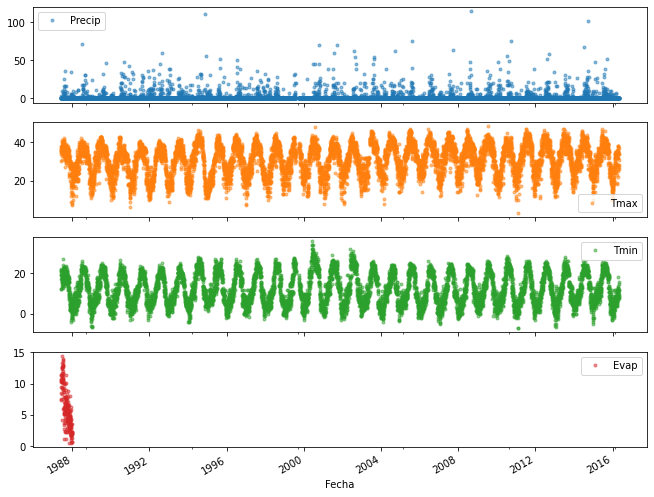

In [ ]:
# Con el cambio de el indice a la fecha, podemos crear una serie de tiempo para cuatro variables:
column = ["Precip", "Tmax", "Tmin", "Evap"]
ax_y = ["Precip (mm)", "Evap (mm)", "Tmax (ºC)", "Tmin (ºC)"]

# marker (se marcan los puntos), alpha ()
ejes = df_muestra[column].plot(marker=".", alpha=0.5, linestyle ="None", figsize=(11,9), subplots=True)

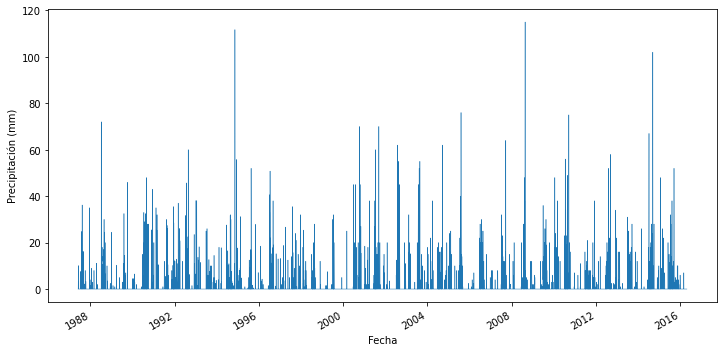

In [ ]:
# Se grafica la precipitación del rango de interes :
# sns.set(rc={'figure.figsize':(12, 6)})
plt.figure(figsize=(12,6))
plt.ylabel("Precipitación (mm)")
df_muestra["Precip"].plot(linewidth=0.5);

precip_prom=df_muestra["Precip"].mean()
#print(precip_prom)

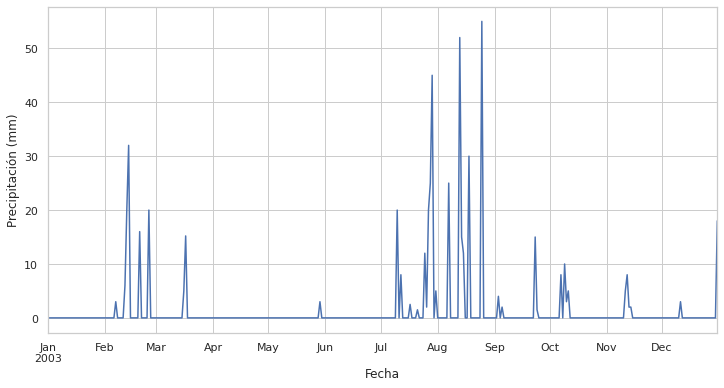

In [ ]:
# Analizando un año de datos:
sns.set(rc={'figure.figsize':(12, 6)}, style="whitegrid")
df_muestra.loc["2003", "Precip"].plot().set_ylabel("Precipitación (mm)");

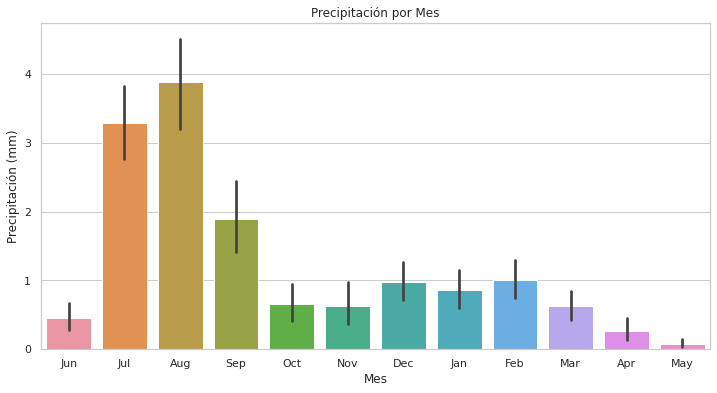

In [ ]:
# Graficacion de la estacionalidad de los datos de precipitación
sns.set_style("whitegrid")
sns.barplot(data=df_muestra, y="Precip", x="Mes");
plt.ylabel("Precipitación (mm)");
plt.title("Precipitación por Mes");

# **Parte 2: Exploración de los datos de Temperaturas**

# **Calculando Tmax y Tmin promedio.**

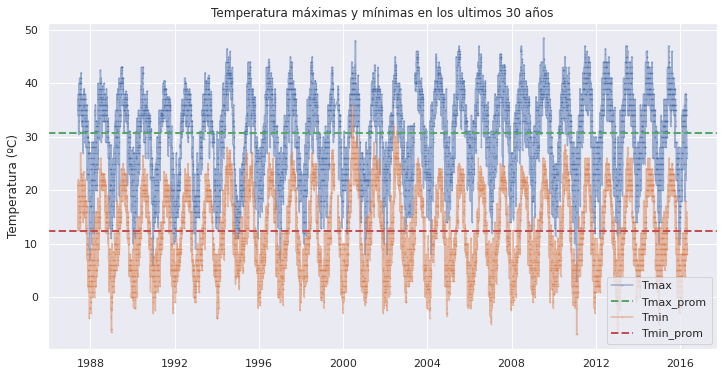

In [ ]:
tmax_prom=df_muestra.Tmax.mean()
tmin_prom=df_muestra.Tmin.mean()


sns.set(rc={'figure.figsize':(12, 6)})
grafica, fig = plt.subplots()
for x in ["Tmax", "Tmin"]:
  fig.plot(df_muestra[x], marker='.', markersize=1, linestyle='-', alpha=0.5, label=x)
  if x == "Tmax":
    plt.axhline(y=df_muestra[x].mean(), color="g", linestyle="--", linewidth=2, label="Tmax_prom")
  else:
    plt.axhline(y=df_muestra[x].mean(), color="r", linestyle="--", linewidth=2, label="Tmin_prom")

fig.legend()

fig.set_ylabel("Temperatura (ºC)")
fig.set_title("Temperatura máximas y mínimas en los ultimos 30 años");

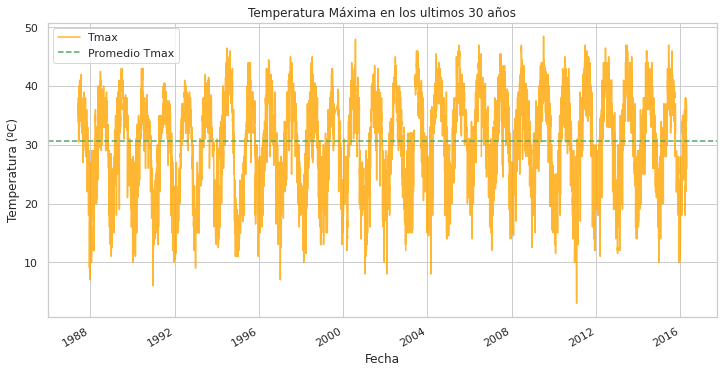

In [ ]:
# Graficas solo para Tmax 
sns.set_style("whitegrid")
tma = df_muestra.Tmax.plot(alpha=0.8, figsize=(12,6), color="orange")
plt.axhline(y=df_muestra.Tmax.mean(), color="g", linestyle="--", label="Promedio Tmax")
tma.set_ylabel("Temperatura (ºC)")

plt.legend()
plt.title("Temperatura Máxima en los ultimos 30 años");

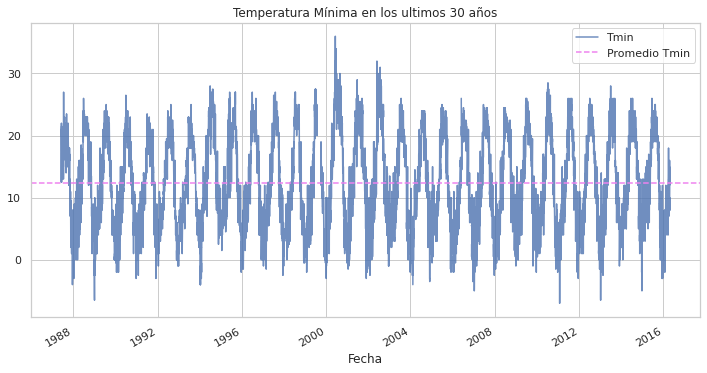

In [ ]:
# Grafica para Tmin
sns.set_style("whitegrid")
tmi = df_muestra.Tmin.plot(alpha=0.8, figsize=(12,6), color="b")
plt.axhline(y=df_muestra.Tmin.mean(), color="violet", linestyle="--", label="Promedio Tmin")
tma.set_ylabel("Temperatura (ºC)")
plt.legend()
#tma.set_title("Temperatura Mínima en los ultimos 30 años");
plt.title("Temperatura Mínima en los ultimos 30 años");

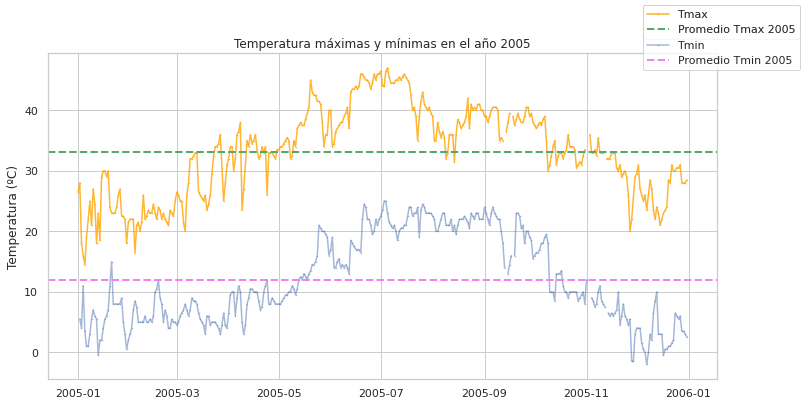

In [ ]:
# Analizando un año de datos para tmin y tmax:
#sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(12, 6)}, style="whitegrid")

start, end ="2005-01", "2005-12"
fig, graf = plt.subplots()
for x in ["Tmax", "Tmin"]:
  if x == "Tmax":
    graf.plot(df_muestra.loc[start:end, x], marker='.', markersize=1, linestyle='-', alpha=0.8, label=x, color="orange")
    plt.axhline(y=df_muestra.loc[start:end, x].mean(), color="g", linestyle="--", linewidth=2, label="Promedio Tmax 2005")
  else:
    graf.plot(df_muestra.loc[start:end, x], marker='.', markersize=1, linestyle='-', alpha=0.5, label=x, color="b")
    plt.axhline(y=df_muestra.loc[start:end, x].mean(), color="violet", linestyle="--", linewidth=2, label="Promedio Tmin 2005")
  fig.legend()
  plt.ylabel("Temperatura (ºC)")
  plt.title("Temperatura máximas y mínimas en el año 2005");
  plt.xlim()

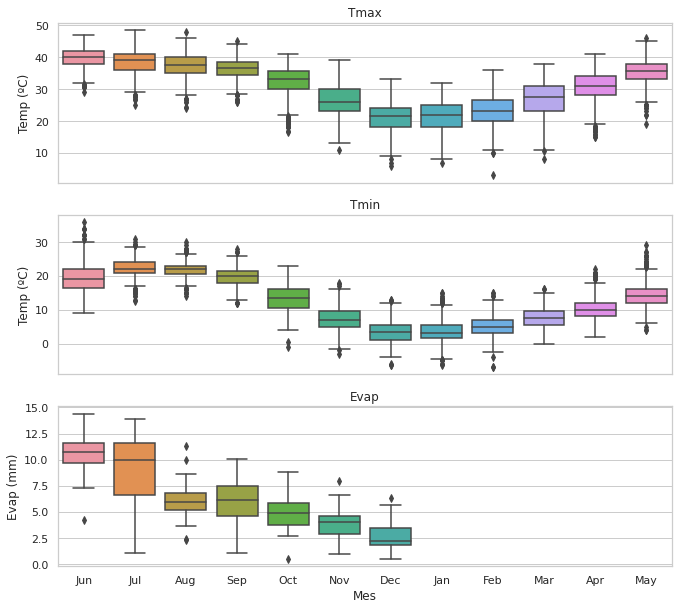

In [ ]:
# Graficando la estacionalidad de los datos con boxplot:
# Boxplot para evaporacion.
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(['Tmax', 'Tmin', 'Evap'], axes):
  sns.boxplot(data=df_muestra, x='Mes', y=name, ax=ax)
  if name != 'Evap':
    ax.set_ylabel('Temp (ºC)')
  else: 
    ax.set_ylabel('Evap (mm)')
  ax.set_title(name)
# Se elimina la etiqueta del eje x excepto la de la subgráfica de abajo 
  if ax != axes[-1]:
    ax.set_xlabel('')

# **Parte 3: Exploramos los datos de la evaporación**

La evaporación promedio es: 6.231578947368423


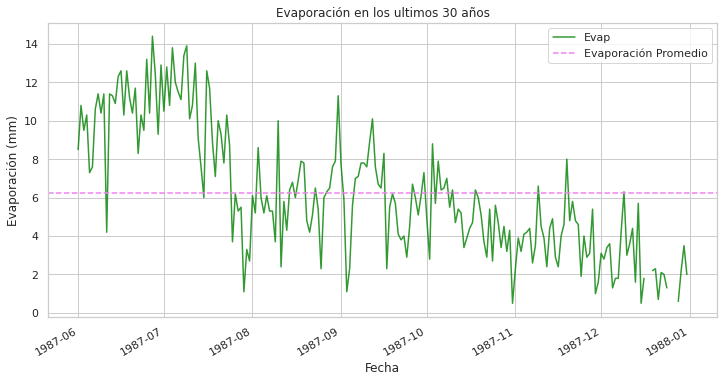

In [ ]:
sns.set_style("whitegrid")

a = df_muestra.Evap.plot(alpha=0.8, figsize=(12,6), color="green")
plt.axhline(y=df_muestra.Evap.mean(), linestyle="--", color="violet", label="Evaporación Promedio")
a.set_ylabel("Evaporación (mm)")
a.set_title("Evaporación en los ultimos 30 años")
plt.legend();
print(f"La evaporación promedio es: {df_muestra.Evap.mean()}")

La evaporación promedio en 1987 es: 6.231578947368423


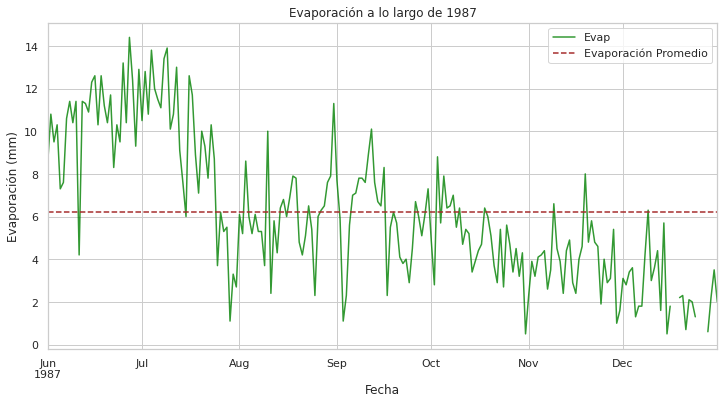

In [ ]:
# Evaporación en el año 1987
# porque solo ese año tengo datos de evaporacion
sns.set_style("whitegrid")

b = df_muestra.loc["1987", "Evap"].plot(alpha=0.8, figsize=(12,6), color="green")
plt.axhline(y=df_muestra.loc["1987", "Evap"].mean(), linestyle="--", color="brown", label="Evaporación Promedio");

b.set_ylabel("Evaporación (mm)")
b.set_title("Evaporación a lo largo de 1987")
plt.legend();
pprom=df_muestra.loc["1987", "Evap"].mean()
print(f"La evaporación promedio en 1987 es: {pprom}")

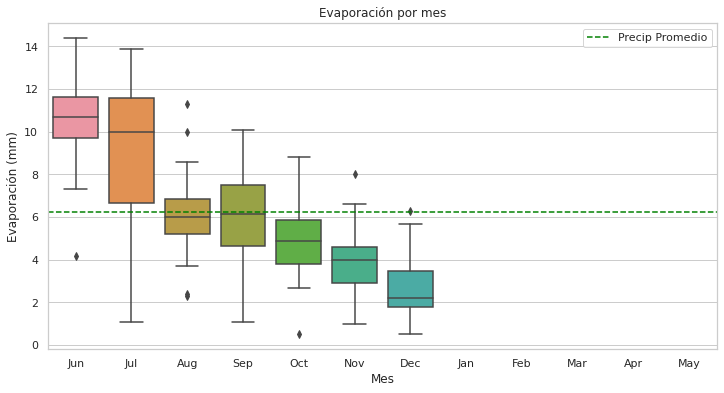

In [ ]:
# Boxplot para la evaporación:
sns.set(rc={'figure.figsize':(12, 6)}, style="whitegrid")
c = sns.boxplot(data=df_muestra, x="Mes", y="Evap",);
c.set_title("Evaporación por mes")
c.set_ylabel("Evaporación (mm)")
plt.axhline(y=df_muestra.Evap.mean(), color="green", linestyle="--", label= "Precip Promedio")
plt.legend();

# **Parte 4: Analisis de los datos con promedios moviles**

In [ ]:
# Suavizando curvas:

columnas=["Evap","Tmax","Tmin"]

df7=df_muestra[columnas].rolling(7, center=True, min_periods=1).mean()
df30=df_muestra[columnas].rolling(30, center=True, min_periods=1).mean()
df365=df_muestra[columnas].rolling(365, center=True, min_periods=1).mean()

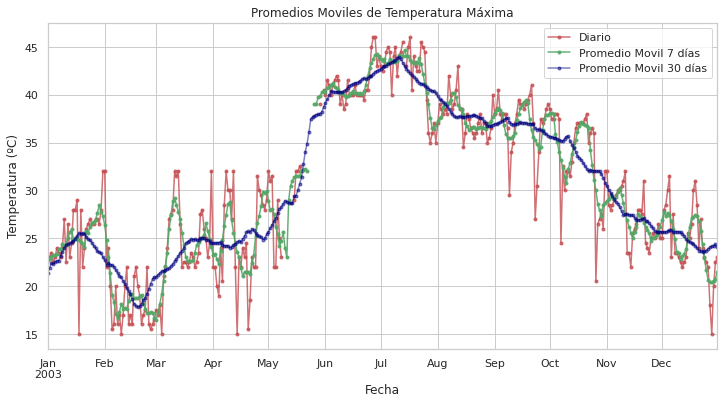

In [ ]:
# Gráfica para temperatura máxima de un año y el contraste con el promedio movil a 7 y 30 dias:
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid")

df_muestra.loc["2003", "Tmax"].plot(alpha=0.8, color="r", marker=".", label="Diario");
df7.loc["2003", "Tmax"].plot(alpha=0.9, color="g", marker=".", label="Promedio Movil 7 días");
df30.loc["2003","Tmax"].plot(alpha=0.5, marker=".", color="navy", label="Promedio Movil 30 días")
plt.legend()
plt.ylabel("Temperatura (ºC)")
plt.title("Promedios Moviles de Temperatura Máxima");

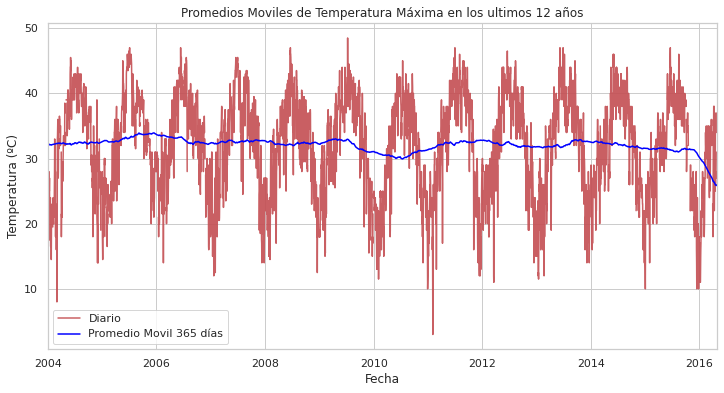

In [ ]:
# Contrastando los datos diarios con las gráficas de promedio móvil de 365 días
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid");

df_muestra.loc["2004":"2016", "Tmax"].plot(alpha=0.9, color="r", label= "Diario");
df365.loc["2004":"2016", "Tmax"].plot(alpha=1, color="blue", label="Promedio Movil 365 días", linestyle="-");

plt.legend()
plt.title("Promedios Moviles de Temperatura Máxima en los ultimos 12 años")
plt.ylabel("Temperatura (ºC)");

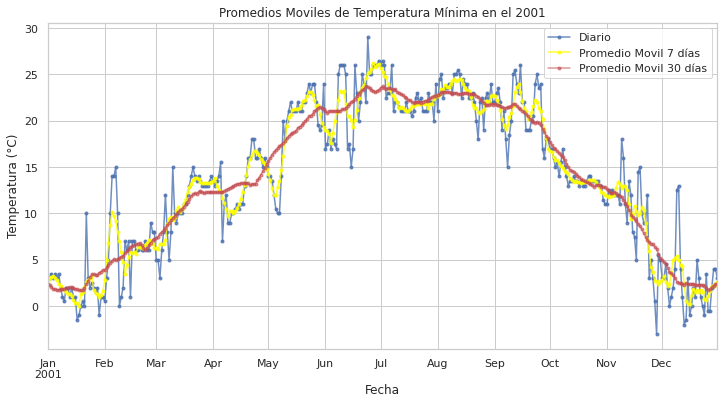

In [ ]:
# Aplicado esta vez a la temperatura
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid")

df_muestra.loc["2001", "Tmin"].plot(alpha=0.8, color="b", marker=".", label="Diario")
df7.loc["2001", "Tmin"].plot(alpha=0.8, color="yellow", marker=".", label="Promedio Movil 7 días");
df30.loc["2001", "Tmin"].plot(alpha=0.6, color="r", marker=".", label="Promedio Movil 30 días");

plt.legend()
plt.ylabel("Temperatura (°C)")
plt.title("Promedios Moviles de Temperatura Mínima en el 2001");

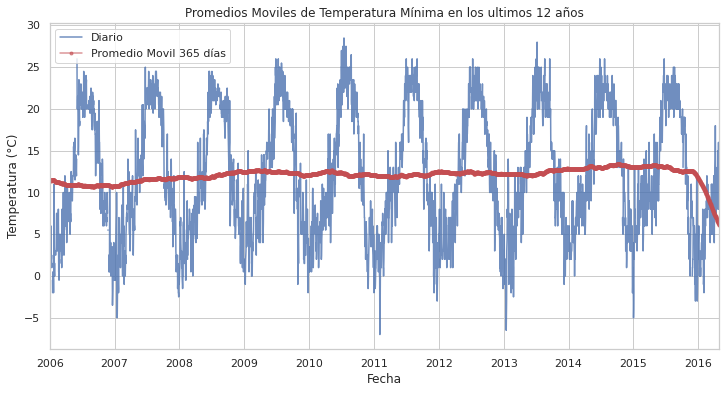

In [ ]:
# Ultimos 12 años de Tmin y promedio movil de 365 días;
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid")

df_muestra.loc["2006":"2018", "Tmin"].plot(alpha=0.8, color="b", label="Diario")
df365.loc["2006":"2018", "Tmin"].plot(alpha=0.6, color="r", marker=".", label="Promedio Movil 365 días")

plt.title("Promedios Moviles de Temperatura Mínima en los ultimos 12 años")
plt.ylabel("Temperatura (°C)");
plt.legend();

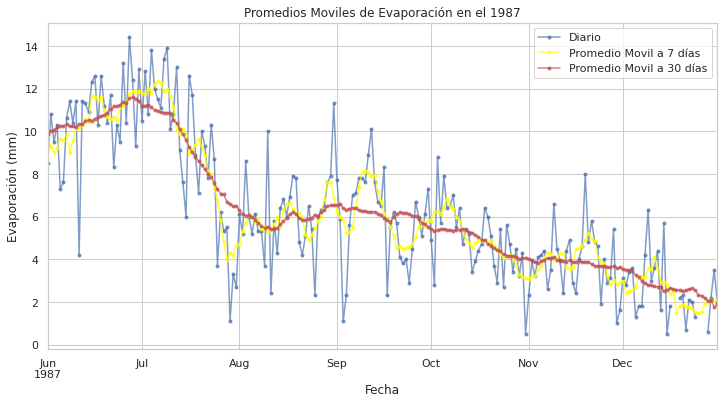

In [ ]:
# Aplicado lo anterior esta vez para la evaporación
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid")
x="1987"
df_muestra.loc[x, "Evap"].plot(alpha=0.7, color="b", marker=".", label="Diario")
df7.loc[x, "Evap"].plot(alpha=0.7, color="yellow", marker=".", label="Promedio Movil a 7 días")
df30.loc[x, "Evap"].plot(alpha=0.7, color="r", marker=".", label="Promedio Movil a 30 días")

plt.title("Promedios Moviles de Evaporación en el 1987")
plt.ylabel("Evaporación (mm)")
plt.legend();

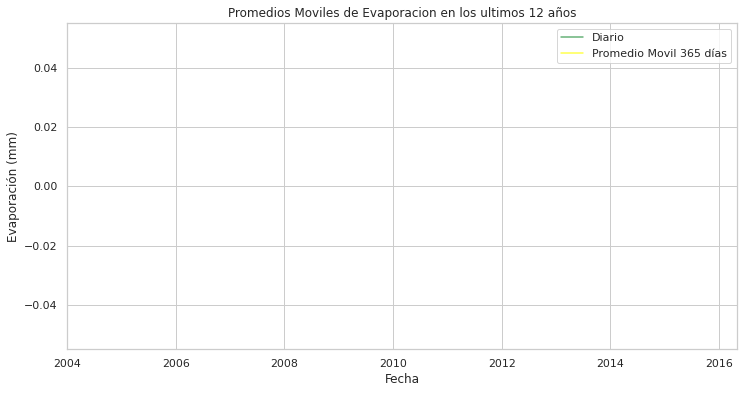

In [ ]:
# Evaporacion y promedios moviles en los ultimos 12 años:
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid")

df_muestra.loc["2004":"2016", "Evap"].plot(alpha=0.9, color="g", label="Diario")
df365.loc["2004":"2016", "Evap"].plot(alpha=0.7, color="yellow", label="Promedio Movil 365 días")

plt.title("Promedios Moviles de Evaporacion en los ultimos 12 años")
plt.ylabel("Evaporación (mm)")
plt.legend();

# **Parte 5: Descomposición de una serie de tiempo con la libreria "statsmodels.tsa"**

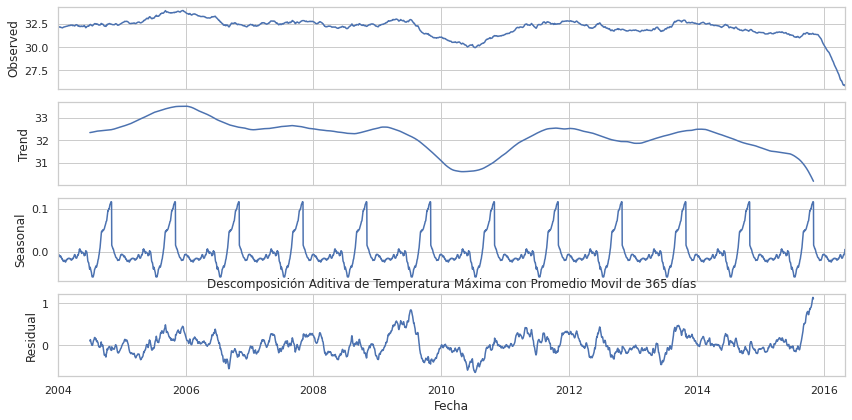

In [ ]:
# Descomposición de Series de Tiempo para Tmax
# Uso de la biblioteca 'statsmodel'
# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid")

# Rango de datos
st, end = "2004", "2016"

# Ciclo anual
freq1=365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 
g = sm.tsa.seasonal_decompose(df365.loc[st:end, "Tmax"].interpolate(), freq=freq1, model="additive" )
g.plot()
plt.title("Descomposición Aditiva de Temperatura Máxima con Promedio Movil de 365 días");

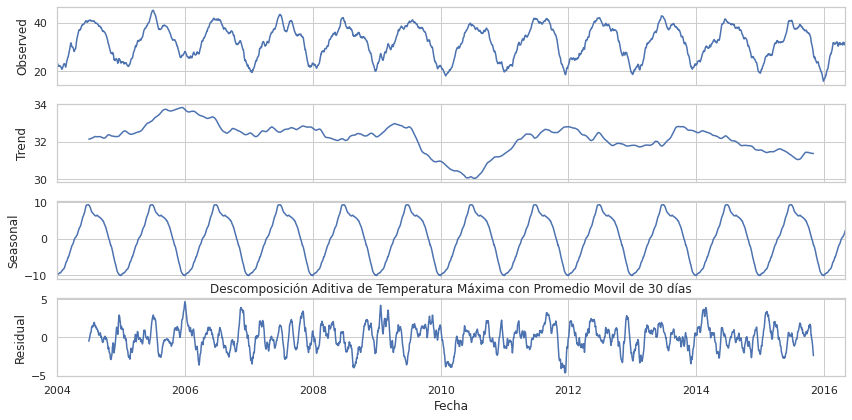

In [ ]:
# Descomposición de Series de Tiempo para Tmax, 30 dias prom movil
# Uso de la biblioteca 'statsmodel'
# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid")

# Rango de datos
st, end = "2004", "2016"

# Ciclo anual (por las estaciones)
freq1=365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 
g = sm.tsa.seasonal_decompose(df30.loc[st:end, "Tmax"].interpolate(), freq=freq1, model="additive" )
g.plot()
plt.title("Descomposición Aditiva de Temperatura Máxima con Promedio Movil de 30 días");

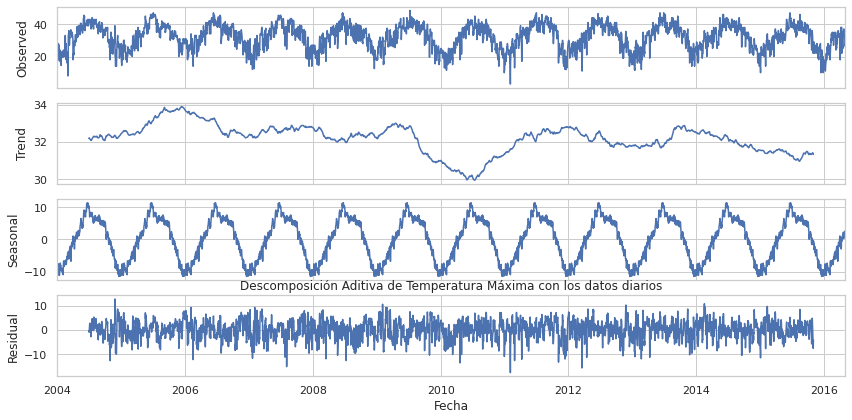

In [ ]:
# Descomposición de Series de Tiempo para Tmax, datos diarios
# Uso de la biblioteca 'statsmodel'
# Modelo Aditivo: Observado = Tendencia + Estacionalidad + Residuo
sns.set(rc={"figure.figsize":(12,6)}, style="whitegrid")

# Rango de datos
st, end = "2004", "2016"

# Ciclo anual
freq1=365

# Uso del modelo 'statsmodel' para el análisis de series de tiempo(sm.tsa) 
g = sm.tsa.seasonal_decompose(df_muestra.loc[st:end, "Tmax"].interpolate(), freq=freq1, model="additive" )
g.plot()
plt.title("Descomposición Aditiva de Temperatura Máxima con los datos diarios");

La temperatura máxima promedio es: 30.720318379160634


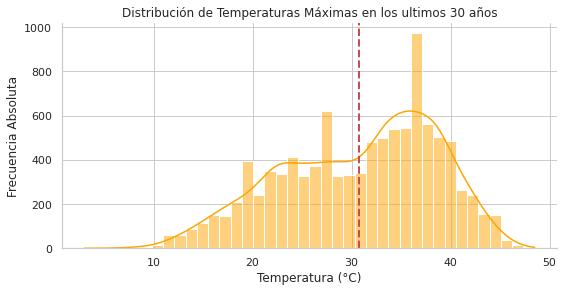

In [ ]:
# Grafica de distribuciónes para Tmax

g1 = sns.displot(df_muestra.Tmax, kde=True, color="orange", height=4, aspect=2)
plt.axvline(x=df_muestra.Tmax.mean(), linestyle="--", linewidth=2, color="r");

plt.title("Distribución de Temperaturas Máximas en los ultimos 30 años")
plt.ylabel("Frecuencia Absoluta")
plt.xlabel("Temperatura (°C)");
print(f"La temperatura máxima promedio es: {df_muestra.Tmax.mean()}")

La temperatura mínima promedio es: 12.30546190155091


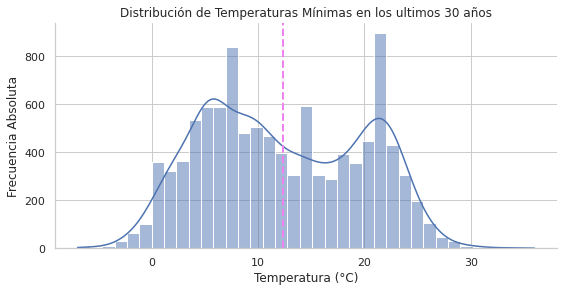

In [ ]:
# Distribución para Tmin
g2 = sns.displot(df_muestra.Tmin, kde=True, height=4, aspect=2)
plt.axvline(x=df_muestra.Tmin.mean(), linestyle="--", linewidth=2, color="violet");

plt.title("Distribución de Temperaturas Mínimas en los ultimos 30 años")
plt.ylabel("Frecuencia Absoluta")
plt.xlabel("Temperatura (°C)");
print(f"La temperatura mínima promedio es: {df_muestra.Tmin.mean()}")

La evaporación promedio es: 6.231578947368423


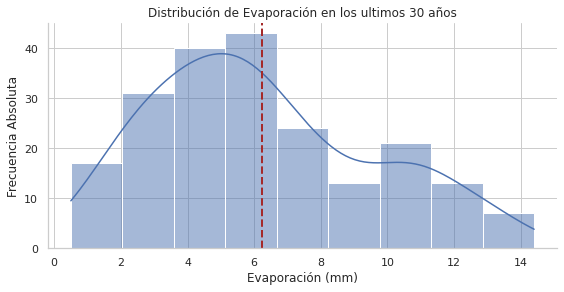

In [ ]:
# Para la evaporación:
g3 = sns.displot(df_muestra.Evap, kde=True, color="b", height=4, aspect=2)
plt.axvline(x=df_muestra.Evap.mean(), linestyle="--", linewidth=2, color="brown");

plt.title("Distribución de Evaporación en los ultimos 30 años")
plt.ylabel("Frecuencia Absoluta")
plt.xlabel("Evaporación (mm)");
print(f"La evaporación promedio es: {df_muestra.Evap.mean()}")